## An Analysis of Air Quality Index in India
Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being.The Air Quality Index (AQI) is used for reporting daily air quality. It tells you how clean or polluted your air is.The higher the AQI value, the greater the level of air pollution and the greater the health concern. The purpose of the AQI is to inform people about their air quality so they can take steps to protect their health. 

Here we are trying to find out the air quality index based on the pollutant particles measured in the air by various stations across India on a daily basis.The dataset set contains air quality data based on the levels of PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene in air and daily AQI level among various stations across multiple cities in India.

The Machine learning regression models is used for analyzing the air quality index.One more possibility of this data is to classify the various possible health impacts on people based on the AQI values and AQI bucketing. The model created helps us to find the particular ranges of air quality indices ,hence the health impacts in the particular cities can be determined.

    AQI bucketing    Remark        Health impacts:

    0-50:            Good          Minimal impact

    51-100:          Satisfactory  Minor breathing discomfort to sensitive people

    101-200:         Moderate      Breathing discomfort to the people with lungs,asthma and heart diseases.

    201-300:         Poor          Breathing discomfort to most people on prolonged exposure.

    301-400:         Very Poor     Respiratory illness on prolonged exposure.

    401-500:         Severe        Affects healthy people and seriously impacts those with existing diseases.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [3]:
df1 = pd.read_csv('station_day.csv')
df1.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,26-08-2018,15.05,43.47,3.30,14.59,10.44,19.91,0.95,10.12,22.85,0.10,0.04,NaN,78,Satisfactory
1,AP001,27-08-2018,10.10,23.92,4.73,13.33,11.02,19.26,0.87,9.24,20.67,0.10,0.08,0.10,66,Satisfactory
2,AP001,28-08-2018,14.43,43.47,6.66,16.04,14.03,17.73,0.95,9.76,24.54,0.09,0.06,0.13,61,Satisfactory
3,AP001,29-08-2018,22.65,57.46,4.52,16.80,12.70,19.88,1.18,8.89,29.44,0.10,0.08,0.10,83,Satisfactory
4,AP001,30-08-2018,28.45,81.89,6.68,19.36,15.81,20.70,1.39,9.78,29.76,0.10,0.07,0.10,87,Satisfactory


In [4]:
df2= pd.read_csv('stations.csv')
df2.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [5]:
df = df2.merge(df1,on='StationId',how='inner')

In [6]:
df.head()

,StationId,StationName,City,State,Status,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,26-08-2018,15.05,43.47,3.30,14.59,10.44,19.91,0.95,10.12,22.85,0.10,0.04,NaN,78,Satisfactory
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,27-08-2018,10.10,23.92,4.73,13.33,11.02,19.26,0.87,9.24,20.67,0.10,0.08,0.10,66,Satisfactory
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,28-08-2018,14.43,43.47,6.66,16.04,14.03,17.73,0.95,9.76,24.54,0.09,0.06,0.13,61,Satisfactory
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,29-08-2018,22.65,57.46,4.52,16.80,12.70,19.88,1.18,8.89,29.44,0.10,0.08,0.10,83,Satisfactory
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,30-08-2018,28.45,81.89,6.68,19.36,15.81,20.70,1.39,9.78,29.76,0.10,0.07,0.10,87,Satisfactory


In [7]:
df.shape

(14863, 20)

# Basic details of DataSet

In [8]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,14732.000000,12794.000000,14468.000000,14561.000000,14490.000000,12049.000000,14499.000000,14037.000000,14223.000000,13711.000000,12370.000000,7917.000000,14863.000000
mean,69.863985,145.699139,24.380886,36.247030,42.744703,23.562475,1.069359,12.713427,34.945354,4.796217,16.763054,3.395318,161.358205
std,76.976588,133.615340,40.297805,31.898898,53.063610,23.818945,1.504737,10.848217,22.380540,12.436245,26.319175,7.190964,128.907021
min,0.040000,1.150000,0.020000,0.010000,0.000000,0.010000,0.000000,0.040000,0.030000,0.000000,0.000000,0.000000,8.000000
25%,20.997500,54.565000,3.690000,13.790000,12.290000,9.330000,0.510000,5.300000,18.990000,0.440000,1.590000,0.270000,72.000000
50%,46.780000,107.100000,8.860000,26.750000,24.850000,16.960000,0.790000,9.850000,30.210000,2.060000,7.820000,1.200000,116.000000
75%,84.410000,181.805000,23.780000,49.750000,46.877500,29.870000,1.250000,16.110000,45.885000,4.810000,20.980000,3.660000,211.000000
max,821.610000,955.600000,383.140000,394.040000,402.270000,325.360000,44.470000,89.520000,162.330000,205.430000,396.870000,170.370000,956.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14863 entries, 0 to 14862
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StationId    14863 non-null  object 
 1   StationName  14863 non-null  object 
 2   City         14863 non-null  object 
 3   State        14863 non-null  object 
 4   Status       14709 non-null  object 
 5   Date         14863 non-null  object 
 6   PM2.5        14732 non-null  float64
 7   PM10         12794 non-null  float64
 8   NO           14468 non-null  float64
 9   NO2          14561 non-null  float64
 10  NOx          14490 non-null  float64
 11  NH3          12049 non-null  float64
 12  CO           14499 non-null  float64
 13  SO2          14037 non-null  float64
 14  O3           14223 non-null  float64
 15  Benzene      13711 non-null  float64
 16  Toluene      12370 non-null  float64
 17  Xylene       7917 non-null   float64
 18  AQI          14863 non-null  int64  
 19  AQI_

In [10]:
df.duplicated().sum()

131

In [11]:
df=df.drop_duplicates(keep='first')
df.shape

(14732, 20)

# Exploratory Data Analysis

In [12]:
#copying the current datset into another specifically for EDA alone
df_EDA = df.copy()

<AxesSubplot:>

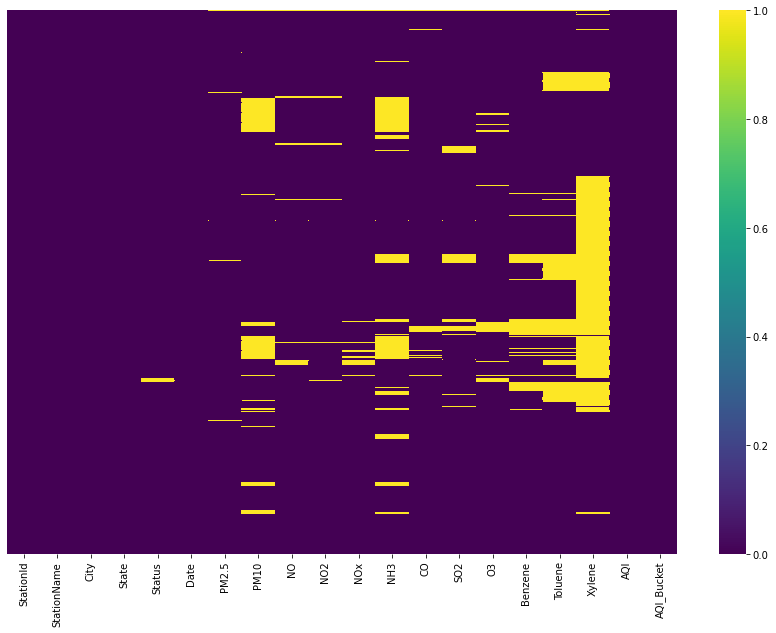

In [13]:
#Plotting the missing values in the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_EDA.isnull(),yticklabels=False,cmap='viridis')

In [14]:
#!pip install missingno

<AxesSubplot:>

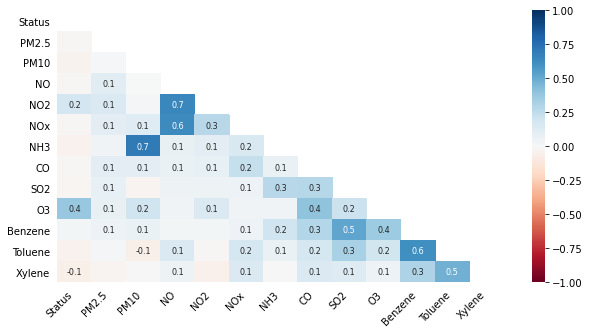

In [15]:
#importing missino package and plotting a heatmp to understand the correlation of missing value with each columns
import missingno as msno
msno.heatmap(df_EDA,figsize = (10,5),fontsize=10)

The above heatmap clearly represent that, there is missing values in 13 fields and more missing values is prresent in Xylene and NH3. there is a high corelatin between NO2 and NO,NH3 and PM10 ,Benzene and Toluene says that if the value of one variable is present then the value of other is likely to be present.

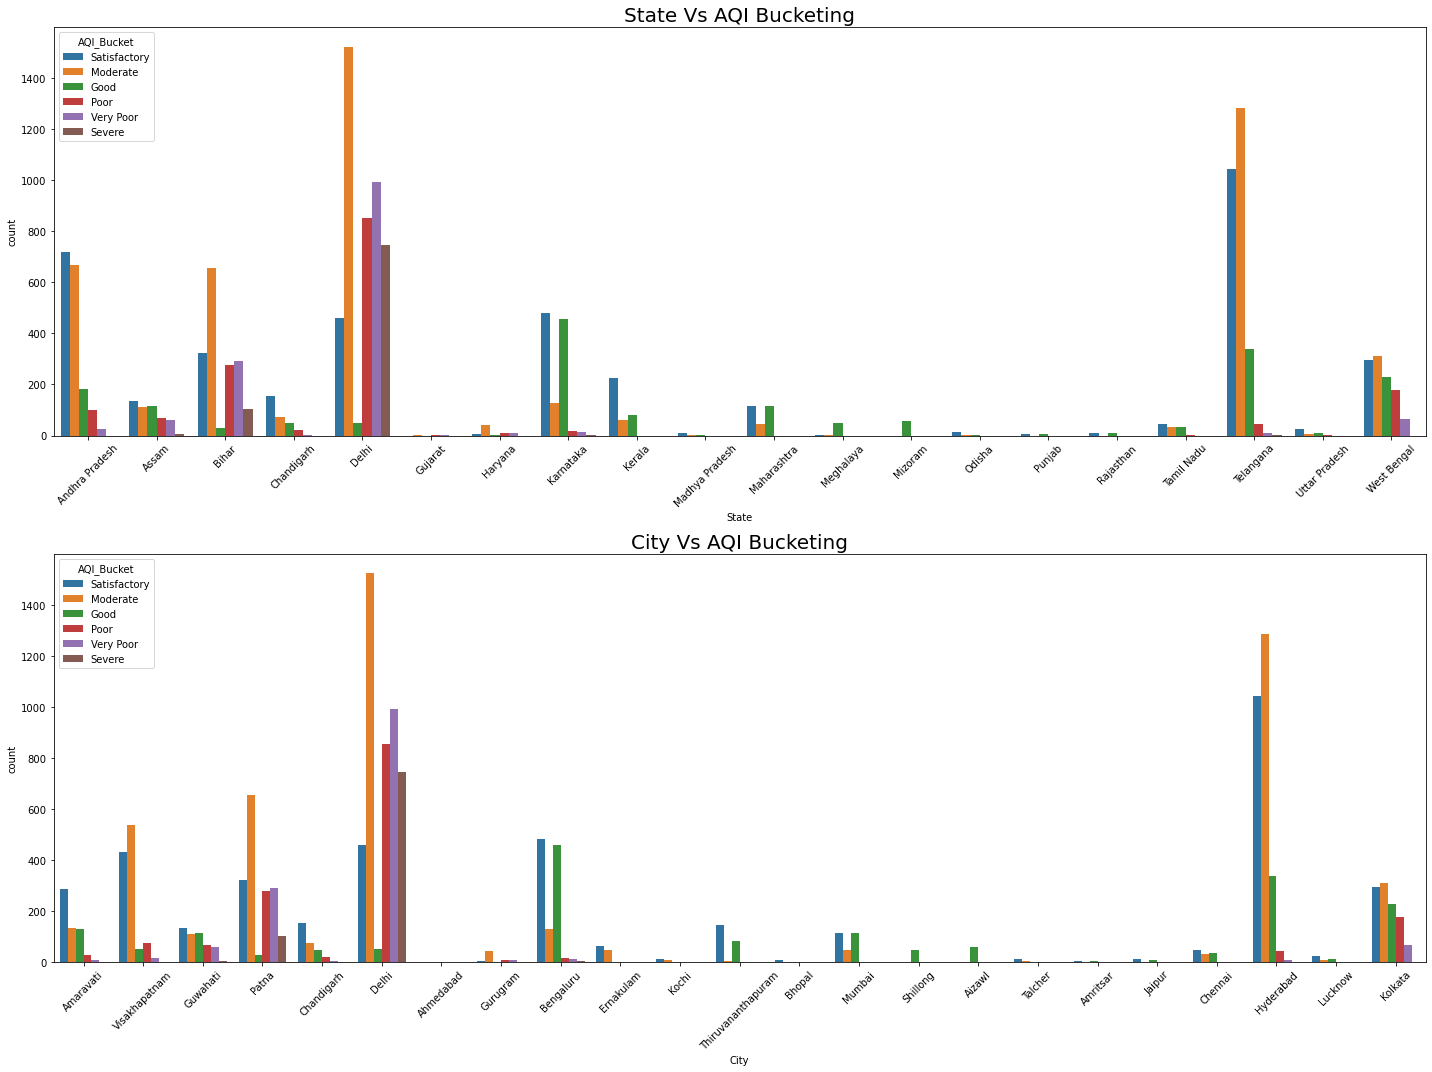

In [16]:
#Plotting countplot of AQI bucketing in different states.
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('State Vs AQI Bucketing',fontsize=20)
ax=sns.countplot(data=df_EDA,x='State',hue='AQI_Bucket')

    
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('City Vs AQI Bucketing',fontsize=20)
ax=sns.countplot(data=df_EDA,x='City',hue='AQI_Bucket')

    
plt.tight_layout()
plt.show()

From the plot,it is obvious that :

1.People of state Delhi is at high risk of air pollution and Bihar(Patna) stands at second place,following Assam(Vishakapatnam) and WestBengal(Kolkata).

2.Pollutants are also high in Hyderabad and Bengaluru,which are in the range of moderate levels.


<AxesSubplot:title={'center':'Plot of Toluene Vs Xylene'}, xlabel='Toluene', ylabel='Xylene'>

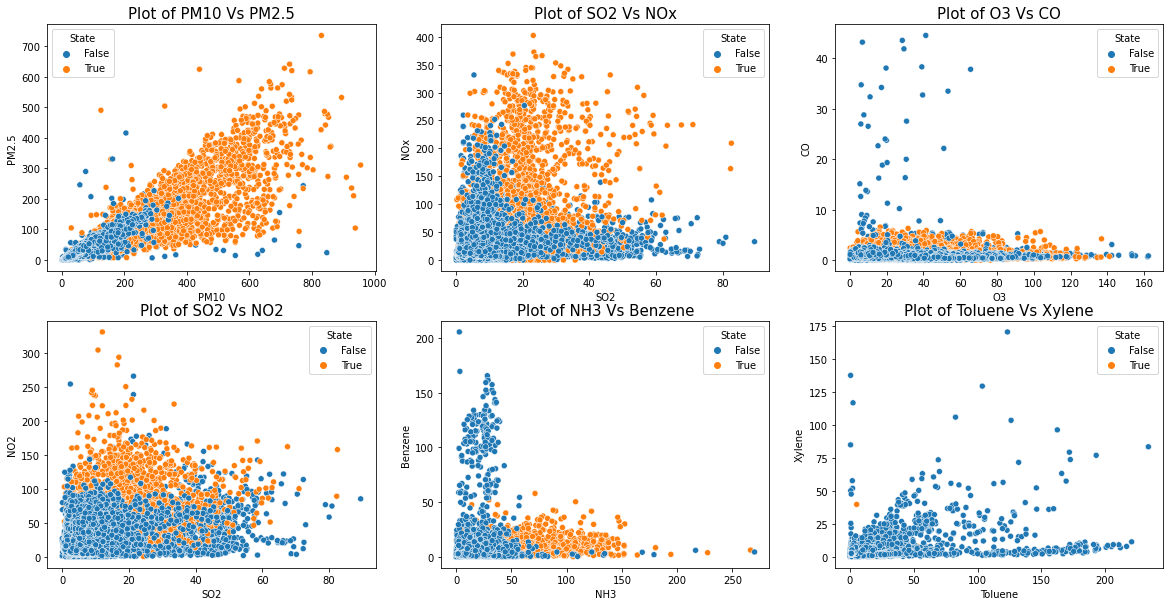

In [17]:
#Now we will find out which is most common pollutant in Delhi
x_Delhi=(df_EDA['State']=='Delhi')

#Plotting all the pollutants plots in Delhi state
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title('Plot of PM10 Vs PM2.5',fontsize=15)
sns.scatterplot(x=df_EDA['PM10'],y=df_EDA['PM2.5'],hue=x_Delhi)

plt.subplot(2,3,2)
plt.title('Plot of SO2 Vs NOx',fontsize=15)
sns.scatterplot(x=df_EDA['SO2'],y=df_EDA['NOx'],hue=x_Delhi)

plt.subplot(2,3,3)
plt.title('Plot of O3 Vs CO',fontsize=15)
sns.scatterplot(x=df_EDA['O3'],y=df_EDA['CO'],hue=x_Delhi)

plt.subplot(2,3,4)
plt.title('Plot of SO2 Vs NO2',fontsize=15)
sns.scatterplot(x=df_EDA['SO2'],y=df_EDA['NO2'],hue=x_Delhi)

plt.subplot(2,3,5)
plt.title('Plot of NH3 Vs Benzene',fontsize=15)
sns.scatterplot(x=df_EDA['NH3'],y=df_EDA['Benzene'],hue=x_Delhi)

plt.subplot(2,3,6)
plt.title('Plot of Toluene Vs Xylene',fontsize=15)
sns.scatterplot(x=df_EDA['Toluene'],y=df_EDA['Xylene'],hue=x_Delhi)



The scatter plots of pollutants shows that the major pollutant in Delhi is PM2.5,PM10 ,NOx and SO2.

In [18]:
df_Delhi=df_EDA[df_EDA['State']=='Delhi']
df_Delhi.head()

,StationId,StationName,City,State,Status,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4164,DL001,"Alipur, Delhi - DPCC",Delhi,Delhi,Active,03-08-2019,27.10,37.19,1.45,43.95,24.56,31.22,0.81,10.22,17.00,0.30,9.35,0.33,49,Good
4165,DL001,"Alipur, Delhi - DPCC",Delhi,Delhi,Active,04-08-2019,35.17,49.98,1.51,48.23,26.88,34.30,0.73,12.42,21.28,0.07,8.79,0.44,55,Satisfactory
4166,DL001,"Alipur, Delhi - DPCC",Delhi,Delhi,Active,05-08-2019,56.25,88.45,3.95,66.31,38.45,37.06,0.93,15.22,33.98,0.21,18.51,0.45,96,Satisfactory
4167,DL001,"Alipur, Delhi - DPCC",Delhi,Delhi,Active,06-08-2019,50.96,77.29,4.98,70.76,41.71,46.58,0.94,10.66,6.76,0.17,18.14,0.19,93,Satisfactory
4168,DL001,"Alipur, Delhi - DPCC",Delhi,Delhi,Active,07-08-2019,24.22,29.95,3.06,48.51,28.30,32.54,0.55,12.30,18.95,0.08,8.63,0.89,49,Good


Text(0, 0.5, 'Pollutants concentration')

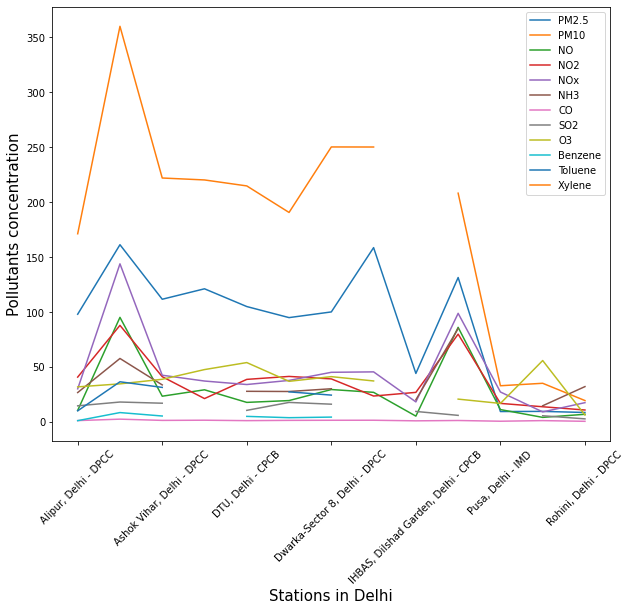

In [19]:
pollutants = ['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene','Toluene', 'Xylene']
df_Delhi.groupby('StationName')[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']].mean().plot(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Stations in Delhi',fontsize=15)
plt.ylabel('Pollutants concentration',fontsize=15)

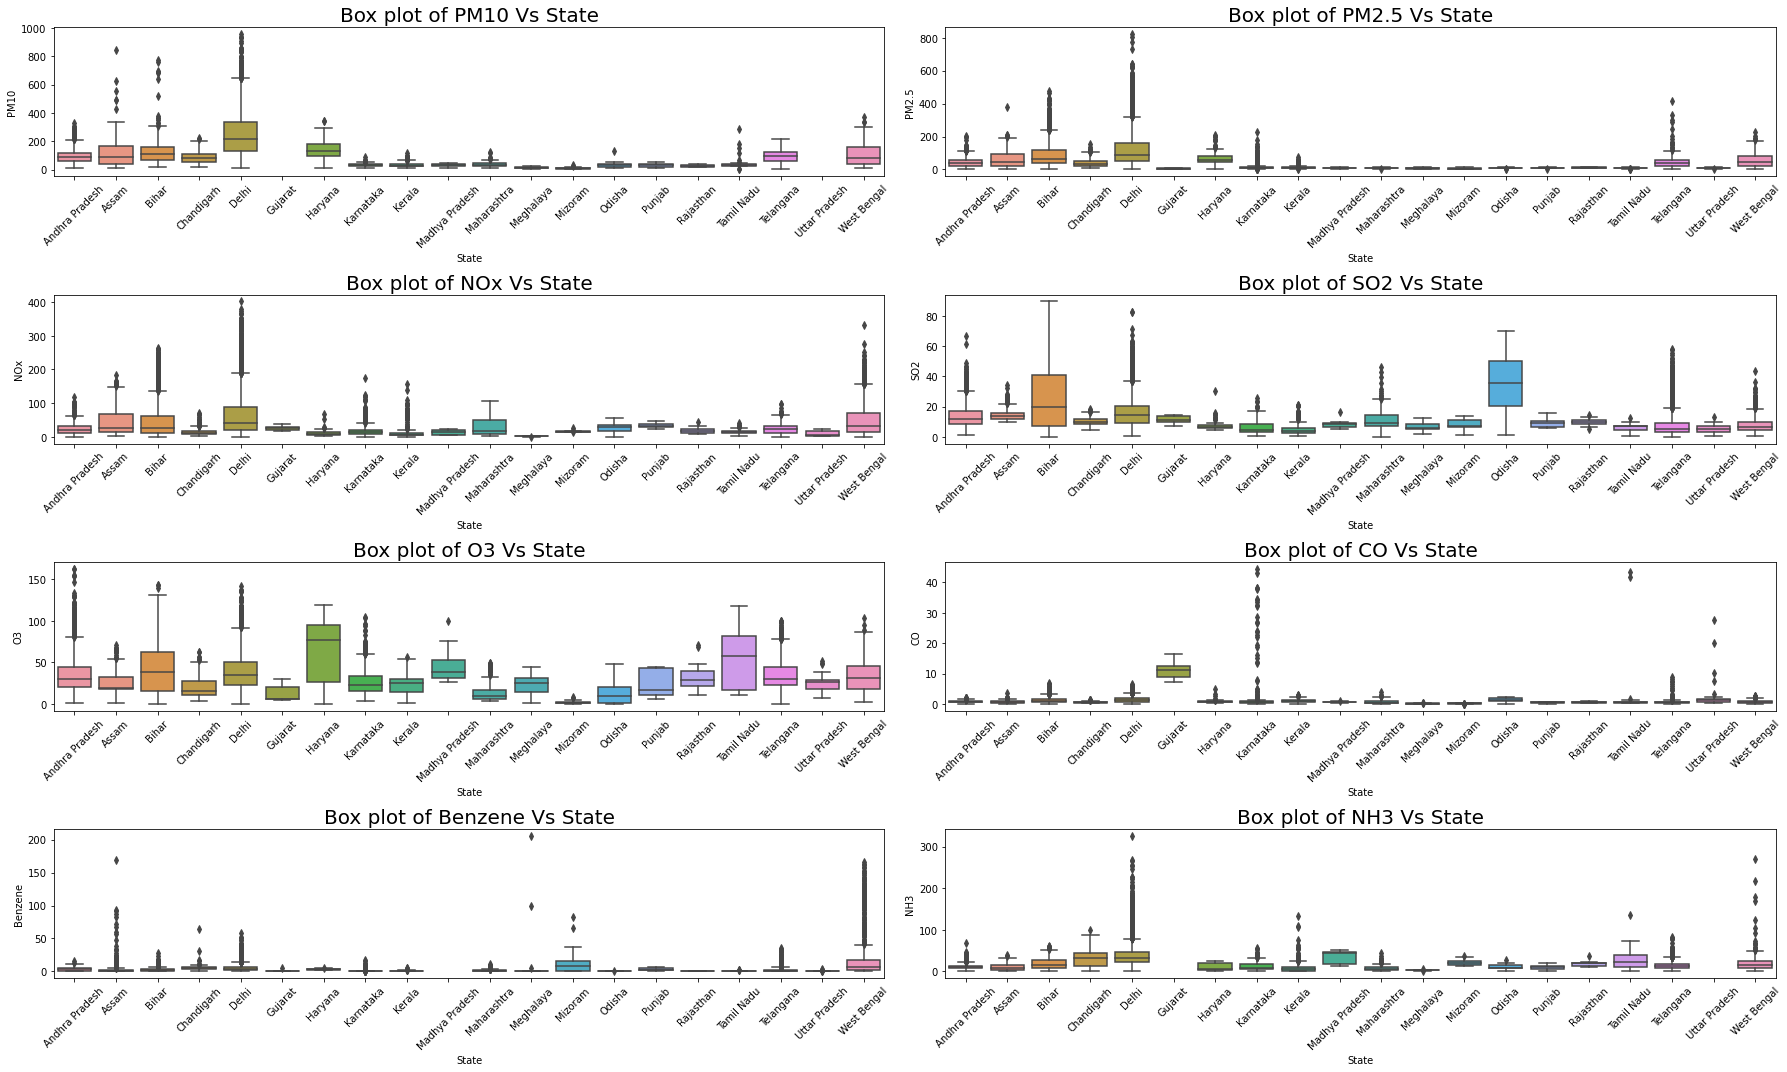

In [20]:
#Plotting showing the major pollutants in states
plt.figure(figsize=(25,15))

plt.subplot(4,2,1)
plt.title('Box plot of PM10 Vs State',fontsize=20)
plt.xticks(rotation=45)
sns.boxplot(x='State',y='PM10',data=df_EDA)

plt.subplot(4,2,2)
plt.title('Box plot of PM2.5 Vs State',fontsize=20)
plt.xticks(rotation=45)
sns.boxplot(x='State',y='PM2.5',data=df_EDA)

plt.subplot(4,2,3)
plt.title('Box plot of NOx Vs State',fontsize=20)
plt.xticks(rotation=45)
sns.boxplot(x='State',y='NOx',data=df_EDA)

plt.subplot(4,2,4)
plt.title('Box plot of SO2 Vs State',fontsize=20)
plt.xticks(rotation=45)
sns.boxplot(x='State',y='SO2',data=df_EDA)

plt.subplot(4,2,5)
plt.title('Box plot of O3 Vs State',fontsize=20)
plt.xticks(rotation=45)
sns.boxplot(x='State',y='O3',data=df_EDA)

plt.subplot(4,2,6)
plt.title('Box plot of CO Vs State',fontsize=20)
plt.xticks(rotation=45)
sns.boxplot(x='State',y='CO',data=df_EDA)

plt.subplot(4,2,7)
plt.title('Box plot of Benzene Vs State',fontsize=20)
plt.xticks(rotation=45)
sns.boxplot(x='State',y='Benzene',data=df_EDA)

plt.subplot(4,2,8)
plt.title('Box plot of NH3 Vs State',fontsize=20)
plt.xticks(rotation=45)
sns.boxplot(x='State',y='NH3',data=df_EDA)
plt.tight_layout()

The above box plots shows that there are many outliers in tha data and also:
    
    1.PM10 and PM2.5 are polluting states of Delhi,Assam and Bihar mainly.
    
    2.In addition to the above mentioned States,NOx pollutant also cause risk in WestBengal.
    
    3.SO2 pollutant plays a major role in states of Bihar and Odisha.
    
    4.O3 pollutant is not on a high risk.
    
    5.Carbon Monoxide is prominent in the state of Gujarat.
    
    6.Benzene is common in Mizoram,WestBengal 
    
    7.NH3 plays a major role in MadhyaPradesh.

In [21]:
#Adding date and year fields into the dataframe after extracting the same from Date field
df_EDA['Month'] = pd.DatetimeIndex(df_EDA['Date']).month
df_EDA['Year'] = pd.DatetimeIndex(df_EDA['Date']).year

In [22]:
df_EDA.head()

,StationId,StationName,City,State,Status,Date,PM2.5,PM10,NO,NO2,...,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,26-08-2018,15.05,43.47,3.30,14.59,...,0.95,10.12,22.85,0.10,0.04,NaN,78,Satisfactory,8,2018
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,27-08-2018,10.10,23.92,4.73,13.33,...,0.87,9.24,20.67,0.10,0.08,0.10,66,Satisfactory,8,2018
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,28-08-2018,14.43,43.47,6.66,16.04,...,0.95,9.76,24.54,0.09,0.06,0.13,61,Satisfactory,8,2018
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,29-08-2018,22.65,57.46,4.52,16.80,...,1.18,8.89,29.44,0.10,0.08,0.10,83,Satisfactory,8,2018
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,30-08-2018,28.45,81.89,6.68,19.36,...,1.39,9.78,29.76,0.10,0.07,0.10,87,Satisfactory,8,2018


In [23]:
df_EDA['Year'].value_counts()

2019    5228
2020    4226
2018    3176
2017    1138
2016     719
2015     245
Name: Year, dtype: int64

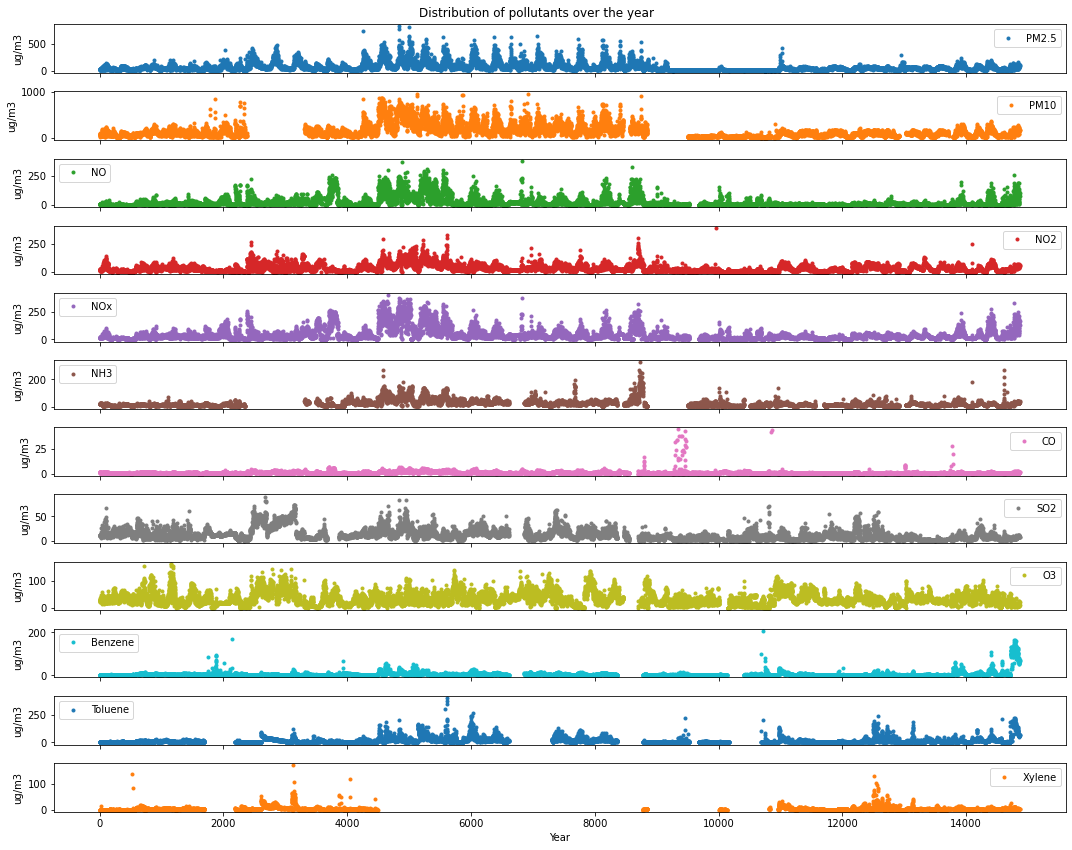

In [24]:
#Plotting the data on pollutants to see how different pollutants are distributed through out the year

pollutants = ['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene','Toluene', 'Xylene']
axes = df_EDA[pollutants].plot(marker='.',alpha = 1, linestyle = 'None', figsize = (15,12), subplots = True,title= "Distribution of pollutants over the year")

for ax in axes:
    ax.set_xlabel('Year')
    ax.set_ylabel('ug/m3')
    
plt.tight_layout()

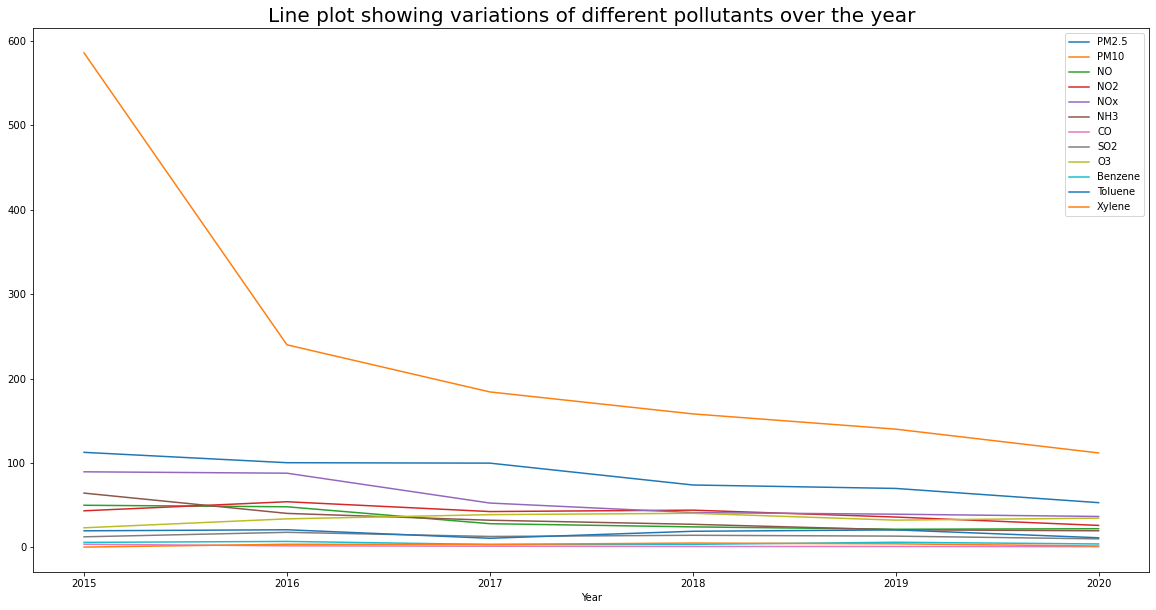

In [25]:
df_EDA.groupby('Year')[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']].mean().plot(figsize=(20,10))
plt.title('Line plot showing variations of different pollutants over the year',fontsize=20)
plt.show()

Here the plot gives us the information that the amount of PM2.5,PM10 and O3 are higher through out the year.Where as the amount of CO in the atmosphere is less through out the year.

Plot of 'PM 10' shows a visible decrease in polluting air.

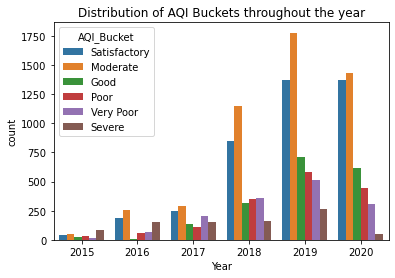

In [26]:
plt.title('Distribution of AQI Buckets throughout the year')
sns.countplot(x='Year', data=df_EDA, hue='AQI_Bucket');
plt.show()

1.2019 and 2020 are the years which have the highest moderate and satisfactory buckets.

2.There is reduction in the pollutants of air in the year 2020 compared 2019.

Minimum and maximum range of AQI: 8 - 956


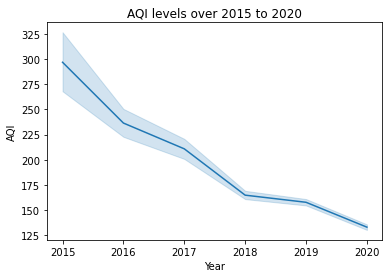

In [27]:
print(f"Minimum and maximum range of AQI: {df_EDA.AQI.min()} - {df_EDA.AQI.max()}")

plt.title('AQI levels over 2015 to 2020')
sns.lineplot(x='Year',y='AQI', data=df_EDA);

The line plot tells us that there is decline in AQI levels over the years which is good thing as it shows an increase in quality of air.

<AxesSubplot:title={'center':'AQI levels over 2020'}, xlabel='Month', ylabel='AQI'>

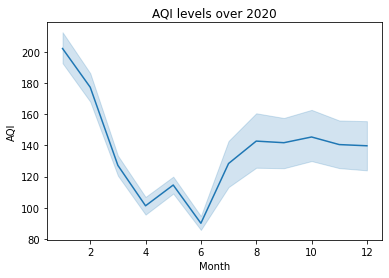

In [28]:
#Level of AQI in the year of 2020 after lockdown
df_covid = df_EDA[df_EDA.Year==2020]
plt.title('AQI levels over 2020')
sns.lineplot(x='Month',y='AQI', data=df_covid)

The line plot clearly represent that there is huge increase in Air quality in the month of April as there was a lockdown by government and we can see the quality of air decreased post lockdown from June.

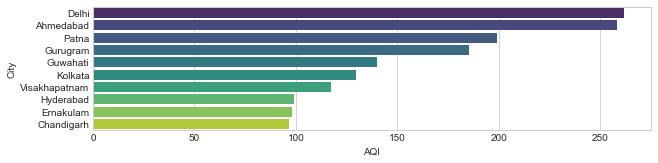

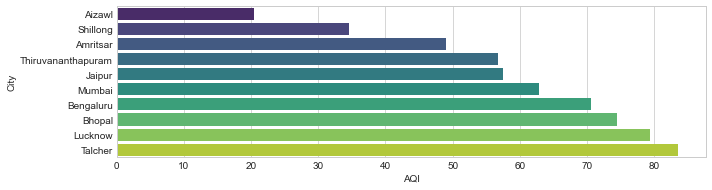

In [29]:
#Grouping the AQI by city and calculating the average AQI per city
x=pd.DataFrame(df_EDA.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='viridis')

x=pd.DataFrame(df_EDA.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=True).head(10))
x=x.reset_index('City')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
plt.subplot(2,1,2)
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='viridis')

plt.tight_layout()

The plot shows:

   1. Delhi is the city which is highly polluted and Ahamedabad is also almost same as Delhi.  
   2. Aizawl and Shillong are the two cities which are less polluted. This gives an idea that North-east cities are not likely polluted.


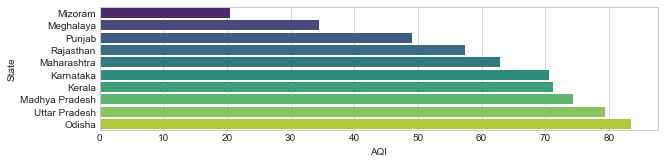

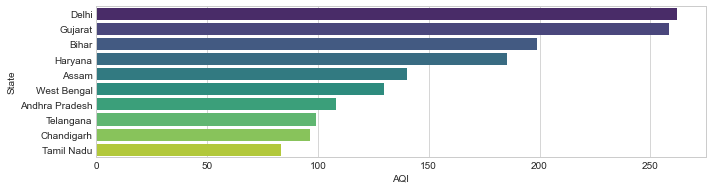

In [30]:
#Grouping the AQI by State and calculating the average AQI per city
x=pd.DataFrame(df_EDA.groupby(['State'])[['AQI']].mean().sort_values(by='AQI',ascending=True).head(10))
x=x.reset_index('State')

#plotting the average AQI per State
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
sns.barplot(data=x,x='AQI',y='State',orient='h',palette='viridis')

x=pd.DataFrame(df_EDA.groupby(['State'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('State')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
plt.subplot(2,1,2)
sns.barplot(data=x,x='AQI',y='State',orient='h',palette='viridis')

plt.tight_layout()

1.Mizoram is the state which is less polluted and Delhi is the one which is highly polluted in terms of AQI.

2.Delhi is the most polluted State.

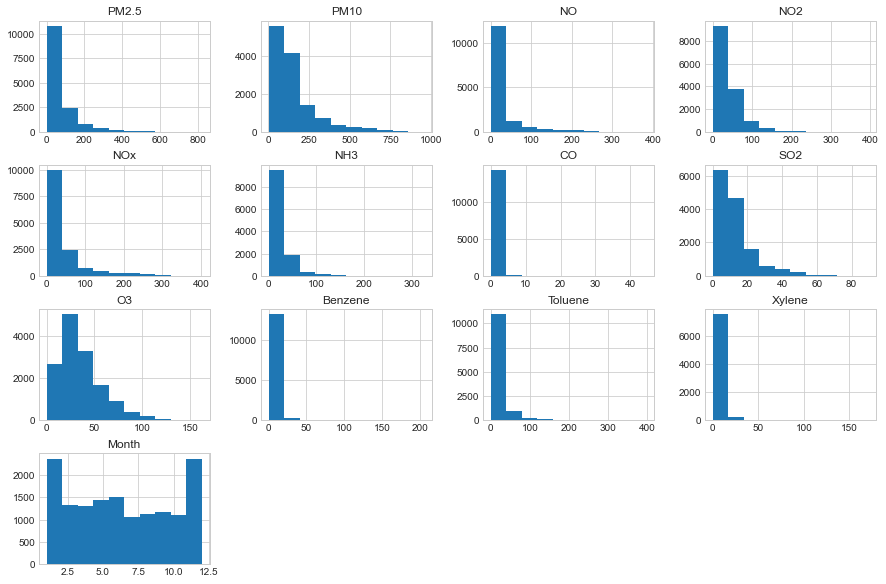

In [31]:
#PLots to determine the skewness of features
df_EDA[[i for i in df_EDA.columns if i not in ["AQI_Bucket","AQI",'Year']]].hist(figsize=(15, 10))
plt.show()

The distribution plots shows that most of the pollutants plots are right skewed.

In [32]:
#Here we can consider the pollutants into two categories:Vehicle pollutants(PM2.5,PM10,NO2,NH3,CO) and Industrial pollutants(CO,SO2,O3,Benzene,Toluene,Xylene)

#Checking correlation with AQI:
df_EDA['Vehicle_pollutants']=df_EDA['PM2.5']+df_EDA['PM10']+df_EDA['NO']+df_EDA['NOx']+df_EDA['NO2']+df_EDA['NH3']+df_EDA['CO']
df_EDA['Industrial_pollutants']=df_EDA['SO2']+df_EDA['O3']+df_EDA['Benzene']+df_EDA['Toluene']+df_EDA['Xylene']

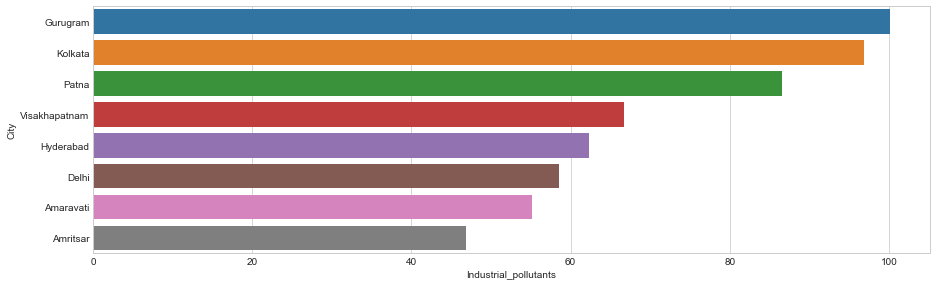

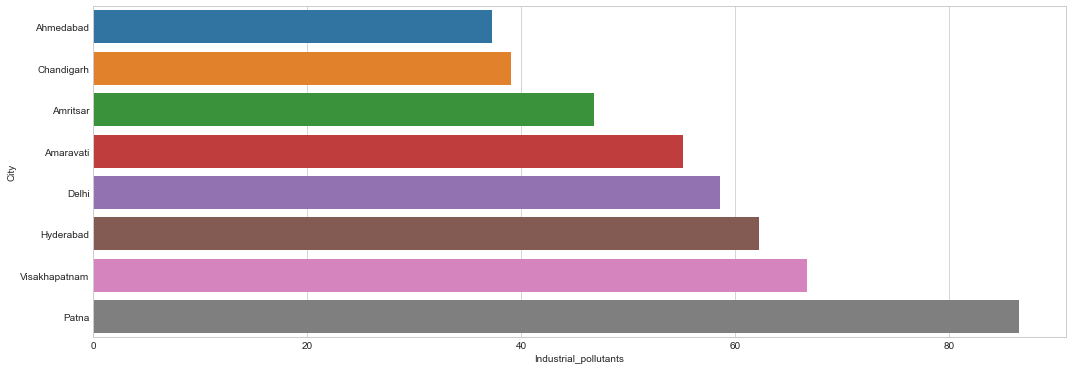

In [33]:
x=pd.DataFrame(df_EDA.groupby(['City'])[['Industrial_pollutants']].mean().sort_values(by='Industrial_pollutants',ascending=False).head(8))
x=x.reset_index('City')
plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.barplot(data=x,x='Industrial_pollutants',y='City',orient='h')


x=pd.DataFrame(df_EDA.groupby(['City'])[['Industrial_pollutants']].mean().sort_values(by='Industrial_pollutants',ascending=True).head(8))
x=x.reset_index('City')
plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.barplot(data=x,x='Industrial_pollutants',y='City',orient='h')

plt.tight_layout()

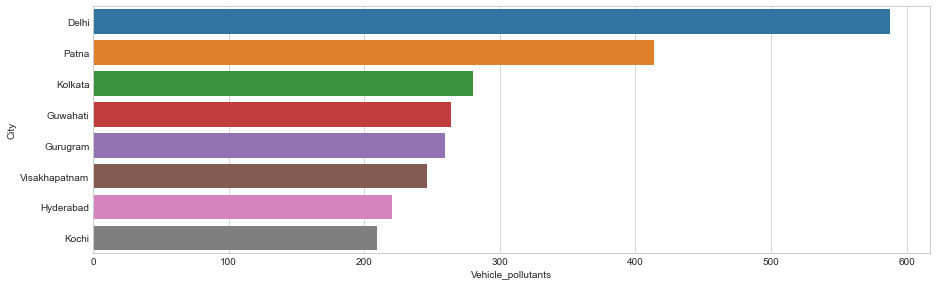

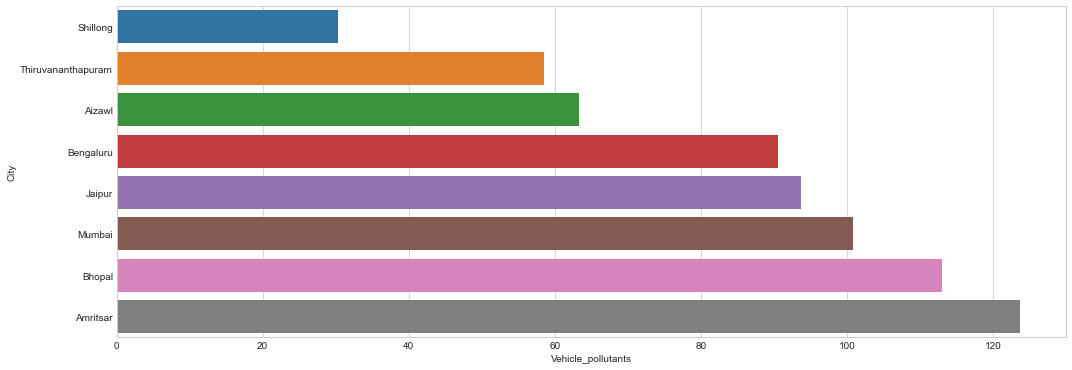

In [34]:
#Mostly polluted cities by vehicle pollutants
x=pd.DataFrame(df_EDA.groupby(['City'])[['Vehicle_pollutants']].mean().sort_values(by='Vehicle_pollutants',ascending=False).head(8))
x=x.reset_index('City')
plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.barplot(data=x,x='Vehicle_pollutants',y='City',orient='h')

#Least polluted cities by vehicle pollutants
x=pd.DataFrame(df_EDA.groupby(['City'])[['Vehicle_pollutants']].mean().sort_values(by='Vehicle_pollutants',ascending=True).head(8))
x=x.reset_index('City')
plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.barplot(data=x,x='Vehicle_pollutants',y='City',orient='h')

plt.tight_layout()

The data plots shows that:

   1. Delhi is mostly polluted city by vehicle pollutants and  Shillong is leastly polluted.
   2. Gurugram is mostly polluted by Industrial pollutants and Ahmedabad is leastly polluted.
   

# Data Preprocessing

### Handling null values

In [35]:
#Checking for null values
df.isna().sum()

StationId         0
StationName       0
City              0
State             0
Status          131
Date              0
PM2.5           131
PM10           2019
NO              394
NO2             284
NOx             372
NH3            2737
CO              364
SO2             826
O3              617
Benzene        1146
Toluene        2487
Xylene         6896
AQI               0
AQI_Bucket        0
dtype: int64

In [36]:
#We are dropping those rows where the status is null as there is very less count
df=df[df['Status'].isna()==False]
df.shape

(14601, 20)

In [37]:
df.isna().sum()  

StationId         0
StationName       0
City              0
State             0
Status            0
Date              0
PM2.5           131
PM10           2019
NO              393
NO2             246
NOx             372
NH3            2735
CO              364
SO2             826
O3              507
Benzene        1125
Toluene        2487
Xylene         6875
AQI               0
AQI_Bucket        0
dtype: int64

<AxesSubplot:>

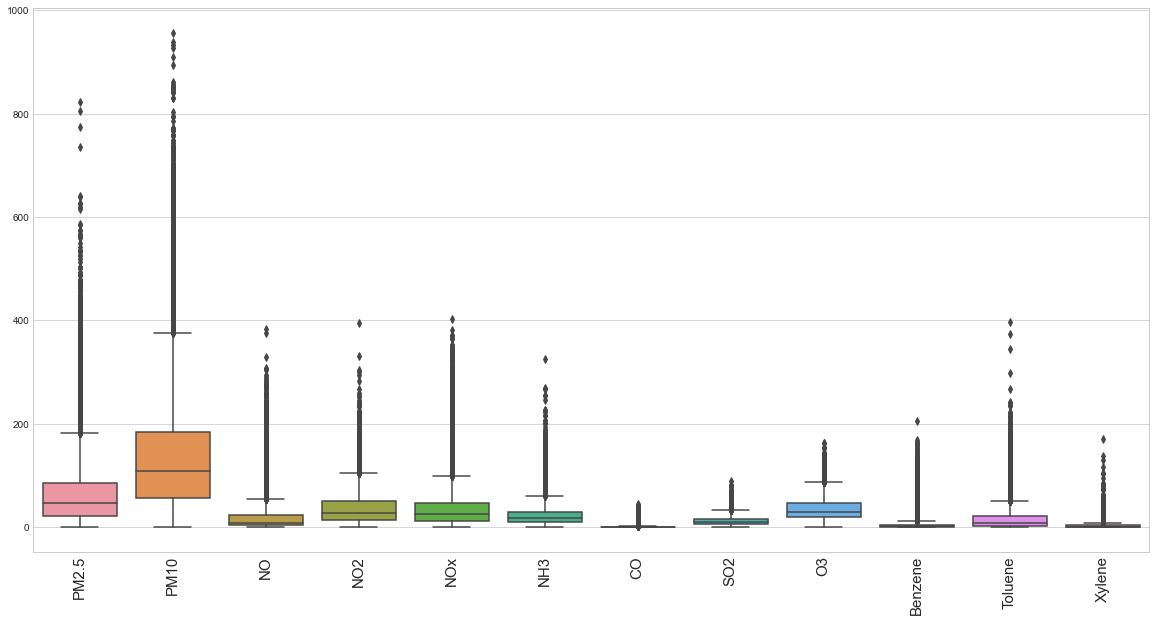

In [38]:
#Before handling the null values in the pollutants concentration with measure is of central,tendencies,lets check for outliers
df2=df[pollutants]
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=15)
sns.boxplot(data=df2)

Since the boxplots shows presence of outliers,we cant go for handling with Mean value of each pollutant.

In [39]:
#Keeping a threshold value since there are many null values in each pollutants.Here we take 10%
limit=len(df)*0.01
for column in df.columns:
    if (df[column].isna().sum()<=limit) & (df[column].isna().sum())>0:
        df=df[df[column].isna()==False] 

In [40]:
df.isna().sum()

StationId         0
StationName       0
City              0
State             0
Status            0
Date              0
PM2.5             0
PM10           1994
NO              365
NO2             216
NOx             346
NH3            2687
CO              338
SO2             792
O3              481
Benzene        1093
Toluene        2453
Xylene         6831
AQI               0
AQI_Bucket        0
dtype: int64

In [41]:
df.shape

(14470, 20)

In [42]:
#we are replacing null values with median.
df2=df[pollutants]
for i in df2.columns:
    df2[i]=df2[i].fillna(df2[i].median())
df2.isna().sum()    

<ipython-input-42-5e18c3b0fc26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i]=df2[i].fillna(df2[i].median())


PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
dtype: int64

In [43]:
df.shape

(14470, 20)

In [44]:

df=df.drop(['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'],axis=1)
df=pd.concat([df,df2],axis=1)

In [45]:
df.shape

(14470, 20)

In [46]:
df.isna().sum()

StationId      0
StationName    0
City           0
State          0
Status         0
Date           0
AQI            0
AQI_Bucket     0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
dtype: int64

Null values are handled.

### Handling Outliers

<AxesSubplot:>

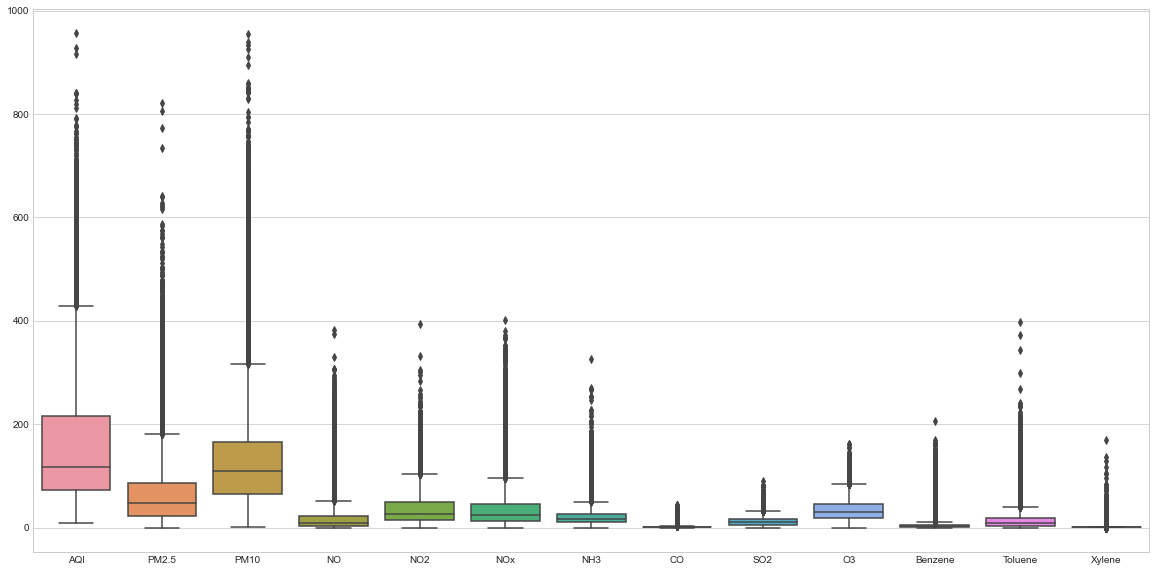

In [47]:
#Replotting after null value handling
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [48]:
#For handling outliers in pollutants
upper_limit=[]
lower_limit=[]
for i in df2.columns:
    Q1=np.percentile(df2[i],25)
    Q2=np.percentile(df2[i],50)
    Q3=np.percentile(df2[i],75)
    IQR=Q3-Q1
    UL=Q3+IQR*1.5
    LL=Q1-IQR*1.5
    upper_limit.append(UL)
    lower_limit.append(LL)         
    print(f'Upper limit of {i} is {UL}')
    print(f'Lower limit of {i} is {LL}')

Upper limit of PM2.5 is 181.42875000000004
Lower limit of PM2.5 is -73.94125000000003
Upper limit of PM10 is 316.66499999999996
Lower limit of PM10 is -85.35499999999999
Upper limit of NO is 52.27875
Lower limit of NO is -25.35125
Upper limit of NO2 is 103.04500000000002
Lower limit of NO2 is -38.97500000000001
Upper limit of NOx is 96.24875
Lower limit of NOx is -37.14124999999999
Upper limit of NH3 is 50.464999999999996
Lower limit of NH3 is -12.854999999999997
Upper limit of CO is 2.295
Lower limit of CO is -0.5449999999999999
Upper limit of SO2 is 31.165000000000003
Lower limit of SO2 is -9.595000000000002
Upper limit of O3 is 84.245
Lower limit of O3 is -19.474999999999994
Upper limit of Benzene is 10.535
Lower limit of Benzene is -5.424999999999999
Upper limit of Toluene is 40.43000000000001
Lower limit of Toluene is -19.970000000000002
Upper limit of Xylene is 1.915
Lower limit of Xylene is 0.6749999999999998


In [49]:
j=0
for i in df2.columns:
    df[i]=np.where(df[i]>upper_limit[j],upper_limit[j],np.where(df[i]<lower_limit[j],lower_limit[j],df[i]))
    j=j+1

In [50]:
Q1=np.percentile(df['AQI'],25)
Q2=np.percentile(df['AQI'],50)
Q3=np.percentile(df['AQI'],75)
IQR=Q3-Q1
UL=Q3+IQR*1.5
LL=Q1-IQR*1.5
upper_limit.append(UL)
lower_limit.append(LL)
outliers_13=[]
for j in df['AQI']:
    if ((j>upper_limit[12]) |(j<lower_limit[12])):
        outliers_13.append(j)
len(outliers_13)

683

In [51]:
ind_AQI = df[(df['AQI'] < lower_limit[12]) | (df['AQI'] > upper_limit[12])]
df['AQI']=np.where(df['AQI']>upper_limit[12],upper_limit[12],np.where(df['AQI']<lower_limit[12],lower_limit[12],df['AQI']))

In [52]:
df.shape

(14470, 20)

All the outliers are handled.

<AxesSubplot:>

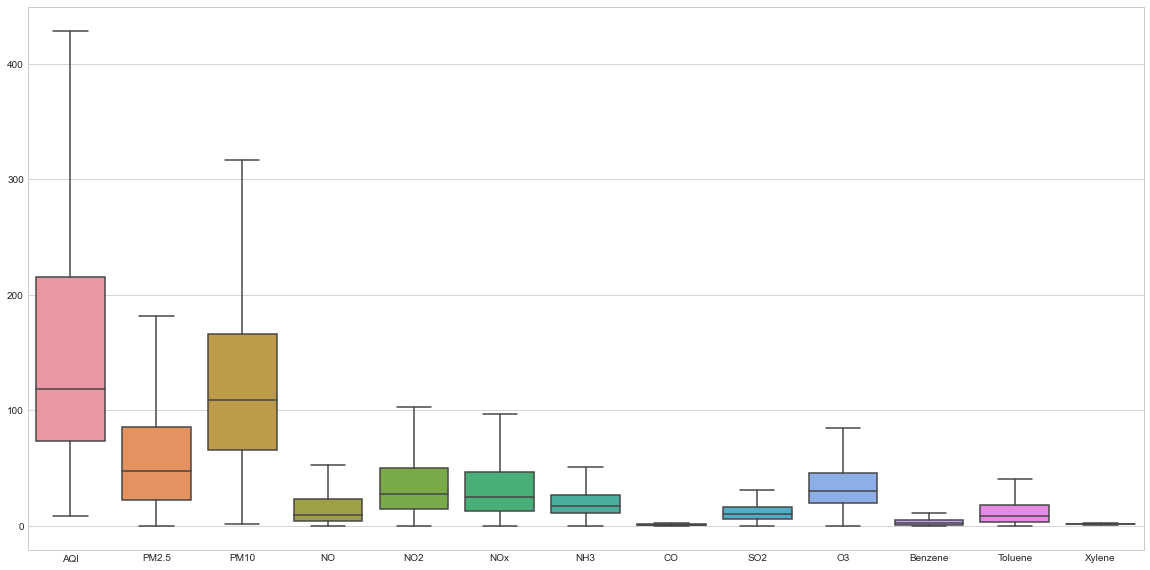

In [53]:
#Replotting after outlier handling
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

### Feature engineering and Feature reduction

In [54]:
#Looking at the features
df.columns

Index(['StationId', 'StationName', 'City', 'State', 'Status', 'Date', 'AQI',
       'AQI_Bucket', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene'],
      dtype='object')

### Feature selection

In [55]:
#since we are creating the model to predict the AQI value for a particular city, 
#we can drop StationID,StationName,State and Status

df_new = df.drop(['StationId', 'StationName','State','Status'],axis=1)


In [56]:
#since AQI_Bucket can be calculated using the AQI value, this feature can be dropped from the training set
df_new.drop('AQI_Bucket',axis=1,inplace=True)

In [57]:
df_new.columns

Index(['City', 'Date', 'AQI', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'],
      dtype='object')

In [58]:
#date fields also can be dropped since we are not consider it as a input fields
df_new.drop('Date',axis=1,inplace=True)

In [59]:
df_new.columns

Index(['City', 'AQI', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene'],
      dtype='object')

In [60]:
#since our target column is AQI, we can split the features into X and y
X_new = df_new.drop('AQI',axis=1)
y_new=df_new['AQI']

In [61]:
X_new.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,Amaravati,15.05,43.47,3.30,14.59,10.44,19.91,0.95,10.12,22.85,0.10,0.04,1.270
1,Amaravati,10.10,23.92,4.73,13.33,11.02,19.26,0.87,9.24,20.67,0.10,0.08,0.675
2,Amaravati,14.43,43.47,6.66,16.04,14.03,17.73,0.95,9.76,24.54,0.09,0.06,0.675
3,Amaravati,22.65,57.46,4.52,16.80,12.70,19.88,1.18,8.89,29.44,0.10,0.08,0.675
4,Amaravati,28.45,81.89,6.68,19.36,15.81,20.70,1.39,9.78,29.76,0.10,0.07,0.675


#### Feature selection using correlation matrix

<AxesSubplot:>

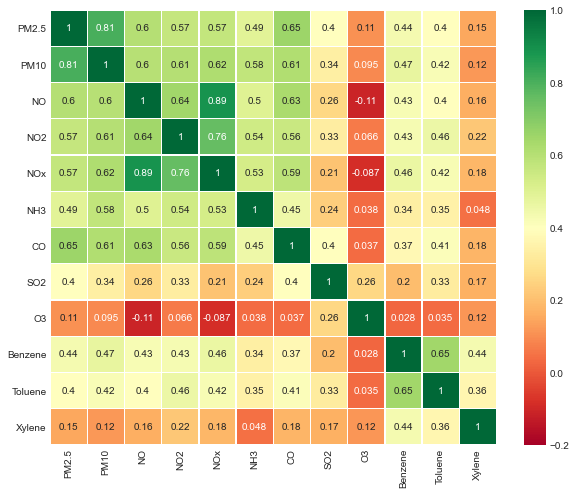

In [62]:
#Plotting the correlation to check the relations between the variables
corr_matrix=X_new.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,linewidth=0.3,vmin=-.2,vmax=1,annot=True,cmap='RdYlGn')

From the correlation matrix  it is clear that, there is high corelation between NOx and NO, so we can drop any of the two

In [63]:
#dropping NOx from the dataset
X_new.drop('NOx',axis=1,inplace=True)

In [64]:
X_new.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')

### Encoding

In [65]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_new['City']=le.fit_transform(X_new['City'])

In [66]:
X_new.head()

,City,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,2,15.05,43.47,3.30,14.59,19.91,0.95,10.12,22.85,0.10,0.04,1.270
1,2,10.10,23.92,4.73,13.33,19.26,0.87,9.24,20.67,0.10,0.08,0.675
2,2,14.43,43.47,6.66,16.04,17.73,0.95,9.76,24.54,0.09,0.06,0.675
3,2,22.65,57.46,4.52,16.80,19.88,1.18,8.89,29.44,0.10,0.08,0.675
4,2,28.45,81.89,6.68,19.36,20.70,1.39,9.78,29.76,0.10,0.07,0.675


In [67]:
X_new['City'].value_counts()

8     4594
11    2699
16    1626
20    1106
4     1099
13    1076
2      575
10     494
6      287
15     278
19     234
7      114
9       68
1       58
17      52
14      45
12      20
18      18
3       11
5       11
0        5
Name: City, dtype: int64

In [68]:
#using variance threshold method to check whether all the feature are having data variance
from sklearn.feature_selection import VarianceThreshold


#Resetting The value of x to make it non categorical

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X_new)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

The get_support returns a Boolean vector where True means that the variable does not have zero variance.

<BarContainer object of 12 artists>

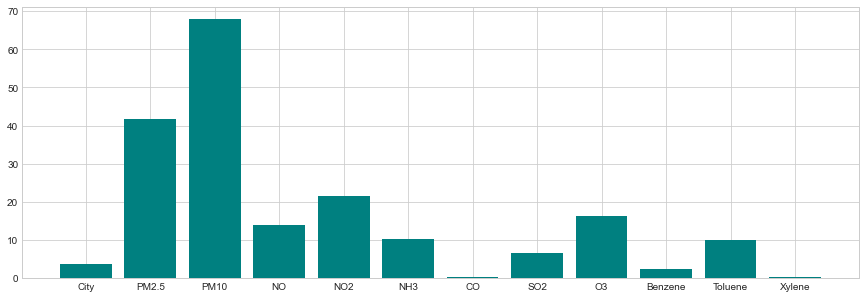

In [69]:
mean_abs_diff = np.sum(np.abs(X_new-np.mean(X_new,axis=0)),axis=0)/X_new.shape[0]
plt.figure(figsize=(15,5))
plt.bar(X_new.columns,mean_abs_diff,color='Teal')

from the MAD graph, its clear that discriminatory power is high for PM10 and PM2.5. Its very low for CO and Xylene

### Scaling

In [70]:
X_scale = X_new.copy()

In [71]:
#Since the values are in different ranges,doing feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X_scale)
X_scale = pd.DataFrame(X_scale,columns=X_new.columns)
X_scale.head()

,City,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,-1.842079,-0.914785,-0.990629,-0.770465,-0.764593,-0.018961,0.002974,-0.220597,-0.564976,-0.954269,-0.995086,-0.040787
1,-1.842079,-1.009372,-1.216910,-0.686542,-0.811522,-0.068718,-0.132614,-0.327194,-0.671544,-0.954269,-0.991884,-1.470295
2,-1.842079,-0.926633,-0.990629,-0.573275,-0.710587,-0.185838,0.002974,-0.264205,-0.482361,-0.957417,-0.993485,-1.470295
3,-1.842079,-0.769561,-0.828702,-0.698866,-0.682280,-0.021257,0.392791,-0.369590,-0.242826,-0.954269,-0.991884,-1.470295
4,-1.842079,-0.658732,-0.545938,-0.572101,-0.586931,0.041513,0.748711,-0.261782,-0.227183,-0.954269,-0.992685,-1.470295


In [72]:
df['City'].value_counts()

Delhi                 4594
Hyderabad             2699
Patna                 1626
Visakhapatnam         1106
Bengaluru             1099
Kolkata               1076
Amaravati              575
Guwahati               494
Chandigarh             287
Mumbai                 278
Thiruvananthapuram     234
Chennai                114
Gurugram                68
Aizawl                  58
Shillong                52
Lucknow                 45
Jaipur                  20
Talcher                 18
Bhopal                  11
Amritsar                11
Ahmedabad                5
Name: City, dtype: int64

# Modelling
### without scaling the data

In [96]:
X_new.head()

,City,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,2,15.05,43.47,3.30,14.59,19.91,0.95,10.12,22.85,0.10,0.04,1.270
1,2,10.10,23.92,4.73,13.33,19.26,0.87,9.24,20.67,0.10,0.08,0.675
2,2,14.43,43.47,6.66,16.04,17.73,0.95,9.76,24.54,0.09,0.06,0.675
3,2,22.65,57.46,4.52,16.80,19.88,1.18,8.89,29.44,0.10,0.08,0.675
4,2,28.45,81.89,6.68,19.36,20.70,1.39,9.78,29.76,0.10,0.07,0.675


In [97]:
y_new.head()

0    78.0
1    66.0
2    61.0
3    83.0
4    87.0
Name: AQI, dtype: float64

In [98]:
#Training the models with selected features
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,random_state=42,test_size=0.2)

In [99]:
#Fitting with the models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [100]:
models={'LinearRegressor':LinearRegression(),
        'LassoRegressor':Lasso(alpha=0.1),
        'RidgeRegressor':Ridge(alpha=1),
        'RandomForestRegressor':RandomForestRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SVR':SVR()
       }

for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+' trained')

LinearRegressor trained
LassoRegressor trained
RidgeRegressor trained
RandomForestRegressor trained
DecisionTreeRegressor trained
SVR trained


In [104]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=[]
rmse=[]
mse=[]
mae=[]
#checking the scores for regressors
for name,model in models.items():
    y_pred=model.predict(X_test)
    rmse.append(mean_squared_error((y_test), (y_pred), squared=False))
    r2score.append(r2_score((y_test),(y_pred)))
    mse.append(mean_squared_error((y_test),(y_pred)))
    mae.append(mean_absolute_error((y_test),(y_pred)))

In [105]:
Models = ['Linear Regression','Lasso Regression','Ridge Regression','Randon Forest Regression','Decision Tree Regression',
          'Support Vector Regression']
model_performance = pd.DataFrame({
    'Model':Models,
    'R2_Score':r2score,
    'Mean_squared_error':mse,
    'Root_Mean_Squared_Error':rmse,
    'Mean_Absolute_error':mae
    })
model_performance

,Model,R2_Score,Mean_squared_error,Root_Mean_Squared_Error,Mean_Absolute_error
0,Linear Regression,0.893598,1338.027866,36.579063,25.459841
1,Lasso Regression,0.893629,1337.642549,36.573796,25.459231
2,Ridge Regression,0.893598,1338.024804,36.579021,25.459918
3,Randon Forest Regression,0.932069,854.246236,29.227491,17.903153
4,Decision Tree Regression,0.875347,1567.533863,39.592093,24.134416
5,Support Vector Regression,0.906247,1178.958934,34.335971,23.089925


### modelling after scaling the data

In [80]:
#rerunning the data again
#X_scale is the df which having scaled data
X_train,X_test,y_train,y_test = train_test_split(X_scale,y_new,random_state=42,test_size=0.2)

In [81]:
models={'LinearR':LinearRegression(),
        'LassoR':Lasso(alpha=0.1),
        'RidgeR':Ridge(alpha=1),
        'RFR':RandomForestRegressor(),
        'DTR':DecisionTreeRegressor(),
        'SVR':SVR()
       }

for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+' trained')

LinearR trained
LassoR trained
RidgeR trained
RFR trained
DTR trained
SVR trained


In [82]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=[]
rmse=[]
mse=[]
mae=[]
#checking the scores for regressors
for name,model in models.items():
    y_pred=model.predict(X_test)
    rmse.append(mean_squared_error((y_test), (y_pred), squared=False))
    r2score.append(r2_score((y_test),(y_pred)))
    mse.append(mean_squared_error((y_test),(y_pred)))
    mae.append(mean_absolute_error((y_test),(y_pred)))

In [83]:
Models = ['Linear Regression','Lasso Regression','Ridge Regression','Randon Forest Regression','Decision Tree Regression',
          'Support Vector Regression']
model_performance = pd.DataFrame({
    'Model':Models,
    'R2_Score':r2score,
    'Mean_squared_error':mse,
    'Root_Mean_Squared_Error':rmse,
    'Mean_Absolute_error':mae
    })
model_performance

,Model,R2_Score,Mean_squared_error,Root_Mean_Squared_Error,Mean_Absolute_error
0,Linear Regression,0.893598,1338.027866,36.579063,25.459841
1,Lasso Regression,0.893610,1337.881125,36.577057,25.459203
2,Ridge Regression,0.893597,1338.034515,36.579154,25.460228
3,Randon Forest Regression,0.931933,855.956252,29.256730,17.903616
4,Decision Tree Regression,0.878745,1524.808915,39.048802,24.005183
5,Support Vector Regression,0.870275,1631.313359,40.389520,26.797004


### Modelling after min max scaler

In [84]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_mms=min_max.fit_transform(X_new)
X_mms=pd.DataFrame(X_mms,columns=X_new.columns)
X_mms.describe()

,City,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000
mean,0.528760,0.346677,0.405392,0.313981,0.340743,0.398724,0.413179,0.382365,0.408209,0.297172,0.308472,0.493529
std,0.232767,0.288522,0.273838,0.326069,0.260589,0.259180,0.257099,0.265244,0.242915,0.301477,0.309012,0.335678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.120087,0.203643,0.071567,0.138521,0.214860,0.226580,0.181526,0.230244,0.053156,0.066287,0.375000
50%,0.500000,0.262613,0.340697,0.170115,0.263503,0.337070,0.344227,0.320643,0.359912,0.201234,0.204304,0.479839
75%,0.650000,0.472052,0.522186,0.442940,0.483113,0.528916,0.535948,0.508916,0.538146,0.431894,0.439772,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
X_train,X_test,y_train,y_test = train_test_split(X_mms,y_new,random_state=42,test_size=0.2)

In [86]:
models={'LinearRegressor':LinearRegression(),
        'LassoRegressor':Lasso(alpha=0.1),
        'RidgeRegressor':Ridge(alpha=1),
        'RandomForestRegressor':RandomForestRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SVR':SVR()
       }

for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+' trained')

LinearRegressor trained
LassoRegressor trained
RidgeRegressor trained
RandomForestRegressor trained
DecisionTreeRegressor trained
SVR trained


In [87]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=[]
rmse=[]
mse=[]
mae=[]
#checking the scores for regressors
for name,model in models.items():
    y_pred=model.predict(X_test)
    rmse.append(mean_squared_error((y_test), (y_pred), squared=False))
    r2score.append(r2_score((y_test),(y_pred)))
    mse.append(mean_squared_error((y_test),(y_pred)))
    mae.append(mean_absolute_error((y_test),(y_pred)))

Models = ['Linear Regression','Lasso Regression','Ridge Regression','Randon Forest Regression','Decision Tree Regression',
          'Support Vector Regression']
model_performance = pd.DataFrame({
    'Model':Models,
    'R2_Score':r2score,
    'Mean_squared_error':mse,
    'Root_Mean_Squared_Error':rmse,
    'Mean_Absolute_error':mae
    })
model_performance

,Model,R2_Score,Mean_squared_error,Root_Mean_Squared_Error,Mean_Absolute_error
0,Linear Regression,0.893598,1338.027866,36.579063,25.459841
1,Lasso Regression,0.893518,1339.032352,36.592791,25.485432
2,Ridge Regression,0.893591,1338.110663,36.580195,25.464252
3,Randon Forest Regression,0.931769,858.019795,29.291975,17.934949
4,Decision Tree Regression,0.880250,1505.884243,38.805724,23.912578
5,Support Vector Regression,0.874339,1580.211854,39.751879,26.511311


### Modelling after normalization of independant features

In [88]:
from sklearn.preprocessing import normalize
X_norm=normalize(X_new)
X_norm=pd.DataFrame(X_norm,columns=X_new.columns)
X_norm.describe()

,City,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000
mean,0.095844,0.345578,0.754062,0.099128,0.221828,0.142022,0.006614,0.089751,0.273444,0.020778,0.084740,0.011068
std,0.087279,0.143399,0.139373,0.093885,0.128334,0.100672,0.004193,0.073666,0.189558,0.025684,0.088641,0.007848
min,0.000000,0.000894,0.039171,0.000096,0.000048,0.000353,0.000000,0.000669,0.000260,0.000000,0.000000,0.001820
25%,0.035285,0.248005,0.689960,0.033815,0.123223,0.081453,0.004239,0.039964,0.121473,0.004647,0.022328,0.005297
50%,0.069980,0.341142,0.789410,0.070247,0.202519,0.120157,0.005779,0.067154,0.225552,0.014355,0.059744,0.009165
75%,0.116615,0.439006,0.844772,0.136977,0.295826,0.161941,0.007694,0.117858,0.394610,0.027604,0.119986,0.013432
max,0.765174,0.881483,0.995498,0.864911,0.943870,0.866871,0.052850,0.695378,0.938376,0.354853,0.832762,0.059471


In [89]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,y_new,random_state=42,test_size=0.2)


models={'LinearRegressor':LinearRegression(),
        'LassoRegressor':Lasso(alpha=0.1),
        'RidgeRegressor':Ridge(alpha=1),
        'RandomForestRegressor':RandomForestRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SVR':SVR()
       }

for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+' trained')


LinearRegressor trained
LassoRegressor trained
RidgeRegressor trained
RandomForestRegressor trained
DecisionTreeRegressor trained
SVR trained


In [90]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=[]
rmse=[]
mse=[]
mae=[]
#checking the scores for regressors
for name,model in models.items():
    y_pred=model.predict(X_test)
    rmse.append(mean_squared_error((y_test), (y_pred), squared=False))
    r2score.append(r2_score((y_test),(y_pred)))
    mse.append(mean_squared_error((y_test),(y_pred)))
    mae.append(mean_absolute_error((y_test),(y_pred)))

Models = ['Linear Regression','Lasso Regression','Ridge Regression','Randon Forest Regression','Decision Tree Regression',
          'Support Vector Regression']
model_performance = pd.DataFrame({
    'Model':Models,
    'R2_Score':r2score,
    'Mean_squared_error':mse,
    'Root_Mean_Squared_Error':rmse,
    'Mean_Absolute_error':mae
    })
model_performance

,Model,R2_Score,Mean_squared_error,Root_Mean_Squared_Error,Mean_Absolute_error
0,Linear Regression,0.626786,4693.243331,68.507250,53.049965
1,Lasso Regression,0.595625,5085.101605,71.309898,55.087934
2,Ridge Regression,0.604347,4975.417031,70.536636,54.371763
3,Randon Forest Regression,0.916800,1046.253273,32.345839,20.627681
4,Decision Tree Regression,0.840017,2011.816171,44.853274,27.971666
5,Support Vector Regression,0.626867,4692.218987,68.499774,49.956315


In [91]:
#code for inversing the scaler or label from the nominal values

# for inverse transformation
#inversed = scaler.inverse_transform(y_pred)
#inversed = inversed.astype('int')
#inversed = pd.DataFrame(inversed,columns = y_test.columns)
#inversed.head()

From the scores of all the models RandomForestRegressor has got very good scores without scaling the features, so we are selecting it as the best model among others. 


### Hyper parameter tuning

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,random_state=42,test_size=0.2)

rfr = RandomForestRegressor()

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [110]:
#function to intake model and predict the values and return the accuracies

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    
    print('RMSE :',mean_squared_error((test_labels), (predictions), squared=False))
    print('R2 :',r2_score((test_labels),(predictions)))
    print('MSE :',mean_squared_error((test_labels),(predictions)))
    print('MAE :',mean_absolute_error((test_labels),(predictions)))
    
    return accuracy

In [117]:
#fitting the base model
rfr.fit(X_train,y_train)

#Different scores from the base model before tuning
evaluate(rfr,X_test,y_test)

RMSE : 29.002320639773387
R2 : 0.9331116301265092
MSE : 841.1346024922253
MAE : 17.801021078092607


87.10727402747105

In [116]:
#finding the best parameter with the help of RandomizesearchCV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [118]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 2 fold cross validation, 

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 50, 
                               cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [120]:
#Best parameters for our models is:
pprint(rf_random.best_params_)

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 800}


In [176]:
#Running the model with best parameters
rfrb = RandomForestRegressor(bootstrap= False,
 max_depth= 50,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 800)

rfrb.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=800)

In [177]:
#rerunning the model with best parameters
#rfb = rf_random.best_estimator_
evaluate(rfrb,X_test,y_test)

RMSE : 28.379479544870655
R2 : 0.9359537117135787
MSE : 805.3948592377319
MAE : 17.492652991518582


87.11235525343247

The new scores after the tuning implies that there is an improvement in the accuracy and scores , so we are selecting tuned model

In [178]:
#pickling the selected model
#import pickle
#pickle.dump(rfrb,open('model.pkl','wb'))

In [129]:
#pickling the label encoder
import pickle
pickle.dump(le,open('label_enc.pkl','wb'))

In [199]:
#function to compress and pickle the data model
import bz2
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)

In [200]:
compressed_pickle('model', rfrb)

In [195]:
#code to decompress the data
#def decompress_pickle(file):
#   data = bz2.BZ2File(file, 'rb')
#   data = pickle.load(data)
#   return data

In [196]:
#model_lat = decompress_pickle('test.pbz2')